<a href="https://colab.research.google.com/github/adityamishra5050/DCGAN-to-EMNIST/blob/main/final_of_DL_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 5**

# **Que. 1)**
 Train a DCGAN to generate images from noise. Use the EMNIST(Extended MNIST)
database to learn the GAN
Network.

In [ ]:
# we are importing different libraries for different task such pandas, matplotlib,and numpy etc.

# here we taking the help of the library mpl_toolkits.mplot3d for visualization part of the dataset
from mpl_toolkits.mplot3d import Axes3D

# here we are using the sklearn library for the standard scalar task which we can do with the help of this
from sklearn.preprocessing import StandardScaler

# here we importing the matplotlib library for the plotting related tasks
import matplotlib.pyplot as plt

# as we know that we can do the linear algebra related things with the help of the library numpy so we are including that also
import numpy as np

# for opening purpose of the directory we are importing the os library
import os

# since we have csv file and we have to preprocess it so we have to take a help of pandas
import pandas as pd

In [ ]:
# we are creating the dataframe which can accept the csv file of the training dataset
my_initial_dataframe_for_train_dataset = pd.read_csv('/content/drive/MyDrive/DL_Assignment5_dataset/emnist-balanced-train.csv', delimiter=',', header=None)

# here we are finding out the number of rows and number of columns for the further processings
number_of_rows_present_in_datset, number_of_columns_present_in_datset = my_initial_dataframe_for_train_dataset.shape
# here we are printing that knowledge which we have created just before
print(f'There are {number_of_rows_present_in_datset} rows and {number_of_columns_present_in_datset} columns')

There are 112800 rows and 785 columns


In [ ]:
# just for the varification purpose i am trying to see the dataset which we have work
my_initial_dataframe_for_train_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# here we printing out the testing dataset in the csv file in the another dataframe
my_initial_dataframe_for_test_dataset = pd.read_csv('/content/drive/MyDrive/DL_Assignment5_dataset/emnist-balanced-test.csv', delimiter=',', header=None)

# here we are finding out the number of rows and number of columns for the further processings
number_of_rows_present_in_datset, number_of_columns_present_in_datset = my_initial_dataframe_for_test_dataset.shape
# here we are printing that knowledge which we have created just before
print(f'There are {number_of_rows_present_in_datset} rows and {number_of_columns_present_in_datset} columns')

There are 18800 rows and 785 columns


In [ ]:
# just for the varification purpose i am trying to see the dataset which we have work
my_initial_dataframe_for_test_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# just for the mapping the classes with their dataset correctly we taking the mapping dataset and making its dataframe for the further processing
my_mapping_for_labelling_dataset = pd.read_csv("/content/drive/MyDrive/DL_Assignment5_dataset/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)

# just for the varification purpose i am trying to print these above 5 values
my_mapping_for_labelling_dataset.head()

<ipython-input-6-ae57ca82b779>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  my_mapping_for_labelling_dataset = pd.read_csv("/content/drive/MyDrive/DL_Assignment5_dataset/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)


0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [ ]:
#since my mapping dataset have to mapped perfectly with my training dataset so that we are making a dictionary for that purpose
my_words_for_dict_label = {}

# we are making a loop for that purpose of mapping
for index, label in enumerate(my_mapping_for_labelling_dataset):
    my_words_for_dict_label[index] = chr(label)

my_words_for_dict_label

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [ ]:
# here we are arranging my dataset for the purpose of further processing so that we can use this dataset easyly
my_initial_dataframe_for_train_dataset_new = my_initial_dataframe_for_train_dataset[my_initial_dataframe_for_train_dataset[0].isin(np.arange(0, 36))]
# for the sake of varification we are trying to see this new arranged dataset
my_initial_dataframe_for_train_dataset_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# here we are arranging my dataset for the purpose of further processing so that we can use this dataset easyly
my_initial_dataframe_for_test_dataset_new = my_initial_dataframe_for_test_dataset[my_initial_dataframe_for_test_dataset[0].isin(np.arange(0, 36))]
# for the sake of varification we are trying to see this new arranged dataset
my_initial_dataframe_for_test_dataset_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18796,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18797,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18798,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Since the index were isturbed in the previous dataset so that we are arranging them also
my_initial_dataframe_for_train_dataset_new.reset_index(inplace=True)
# for the sake of varification we are seeing the arranged dataset also
my_initial_dataframe_for_train_dataset_new

,index,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# since we have to seperate out the training part of feature space so we using .loc function to seperate it out
my_training_data_for_x = my_initial_dataframe_for_train_dataset_new.loc[:, 1:]
# similarly we have to seperate out the classes of the dataset for traing losses and validation losses
my_training_data_for_y = my_initial_dataframe_for_train_dataset_new.loc[:, 0]

# just for the varification we are printing the shape of that newly created dataframes
my_training_data_for_x.shape, my_training_data_for_y.shape

((86400, 784), (86400,))

In [ ]:
# for the sake of varification i am printing this y label class for the above 5 entries
my_training_data_for_y.head(5)

0    15
1     4
2    26
3    32
4    20
Name: 0, dtype: int64

In [ ]:
# we are creating a function which will flip and rotate the image for creating the noise purpose
def flip_and_rotate(image):
    Width_of_image = 28 # here we are deciding the width of the image as the 28
    Hight_of_image = 28 # here we are deciding the hight of the image as the 28
    # here we are reshaping my image for the simplification purposes
    image = image.reshape(Width_of_image, Hight_of_image)
    # here we applying that flip function to my reshapped image
    image = np.fliplr(image)
    # here we are applying the rotate 90 function to rotate my reshapped image to the 90 degree
    image = np.rot90(image)
    # here we are giving out the final image which we  are recieving after applying the flip and rotate function
    return image

In [ ]:
# here we are applying that flip and rotate function all my image for the further processing
my_training_data_for_x = np.apply_along_axis(flip_and_rotate, 1, my_training_data_for_x.values)
# here for the sake of the varification we are applying the shape function to know about the shape of my dataset
my_training_data_for_x.shape

(86400, 28, 28)

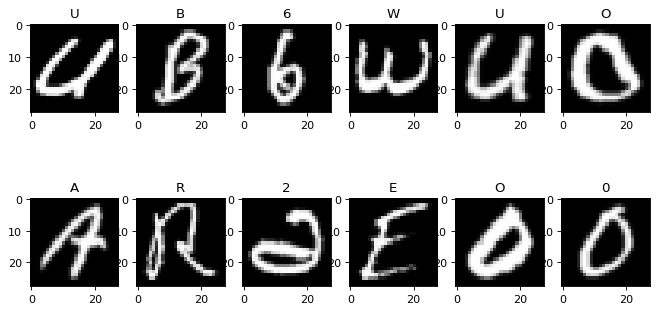

In [ ]:
# just for the varification that my dataset is perfectly processed for the another task we are printing those images
# for the plotting purpose we are using the matplotlib library and giving the shape of 10, 8 for the image view
plt.figure(figsize=(10, 8), dpi=80)
#here we are applying the for loop for the image printing purposes
for i in range(106, 118):
  # here we are using the subplot for that purpose to print al those images all together
    plt.subplot(3,6,i-99)
    # here we are finally printing those images so that we can ensure our work till now
    plt.imshow(my_training_data_for_x[i], cmap=plt.cm.gray)
    # we are using our library for that mapping purpose of the classes with the particular
    plt.title(my_words_for_dict_label[my_training_data_for_y[i]])

In [ ]:
# here the main task is starting with importing some of the important libraries such as
# torch and torchvision
import torch
# since my task need most power ful computing power so we using the google colab gpu for this purpose
device = 'cuda' if torch.cuda.is_available() else 'cpu'
#here we are seeing that if it is available or not for the further processing
print(device)

cuda


In [ ]:
# here we aimporing the torch.nn module for the creation of the generator and the discriminator for our task
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DL_Assignment5_dataset/emnist-balanced-train.csv',delimiter=',', header=None)

In [ ]:
# here we are normalizing the training dataset values for the purpose of ease in the model appicability
final_training_data = my_training_data_for_x/255.0



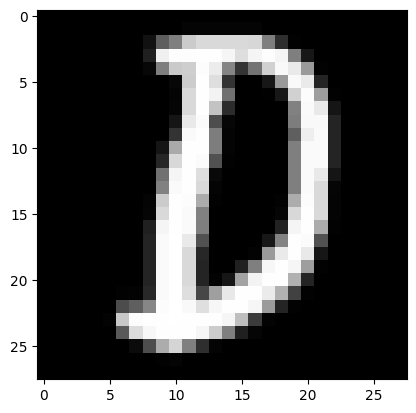

In [ ]:
# now again we are plotting this dataset point as an image for the varification purposes
plt.imshow(final_training_data[7], cmap = 'gray')

In [ ]:
# here we are using the torch.Tensor for making my all dataset points to the tensor for applying the model
final_training_data = torch.Tensor(final_training_data)
# here we are confirming that my all dataset points are converted into the tensor value or not
print(isinstance(final_training_data, torch.Tensor))

# here we are initiallizing the random seed which will craete the starting point for the firther processing
random_seed = 1
# We are taking our batch size , so that my model can work eith batches
batch_size = 32
# here we are applying the tarinloader so that we can load the dataset into the model with the ease
final_training_data_loader = DataLoader(final_training_data, batch_size, shuffle = True)

True


In [ ]:
# here we are generating the noise for the dataset because we instructed to the generate ten noise vectors that act as latent representation vectors, and
# generate the images for these noise vectors,
def random_noise_generator(batch_size, dim):
    return torch.rand(batch_size, dim)*2 - 1

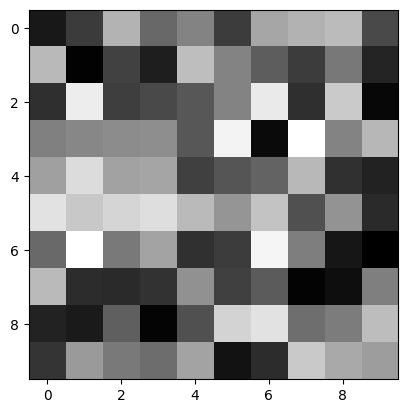

In [ ]:
# for the sake of varification that we are generating that noise vector correctly we creating one noise vector and visuallizing it here
a_random_noise = random_noise_generator(64, 100)
# as we created that noise vector we have to reshape it for the right view
b_random_noise = a_random_noise[2]
# with the help of reshape function we can just reshape this noise vector
b_random_noise = b_random_noise.reshape(10, 10)
b_random_noise = b_random_noise.numpy()
# as we created the noise vector correctly now its time to visualize it
plt.imshow(b_random_noise, cmap = 'gray')

In [ ]:
#The Discriminator is a neural network that identifies real data from the fake data created by the Generator.
# The discriminator's training data comes from different two sources:

#The real data instances, such as real pictures of birds, humans, currency notes, etc., are used by the Discriminator as positive samples during training.

#The fake data instances created by the Generator are used as negative examples during the training process.

class Discriminator(nn.Module):

    def __init__(self):
        super().__init__()
        # here we are Initializing a 2D convolutional layer with 1 input channel, 32 output channels,
        # a kernel size of 3x3, a stride of 2 pixels, and padding of 1 pixel.
        self.conv0 = nn.Conv2d(1, 32, kernel_size = 3, stride = 2, padding = 1)
        # here we are using the concept of dropout and applying it with p = 0.25
        # that means we aare dropping out the 25% connections
        self.conv0_drop = nn.Dropout2d(0.25)
        # here we are Initializing a 2D convolutional layer with 32 input channel, 64 output channels,
        # a kernel size of 3x3, a stride of 2 pixels, and padding of 1 pixel.
        self.conv1 = nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1)
        # here we are using the concept of dropout and applying it with p = 0.25
        # that means we aare dropping out the 25% connections
        self.conv1_drop = nn.Dropout2d(0.25)
        # here we are Initializing a 2D convolutional layer with 64 input channel, 128 output channels,
        # a kernel size of 3x3, a stride of 2 pixels, and padding of 1 pixel.
        self.conv2 = nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1)
        # here we are using the concept of dropout and applying it with p = 0.25
        # that means we aare dropping out the 25% connections
        self.conv2_drop = nn.Dropout2d(0.25)
        # here we are Initializing a 2D convolutional layer with 128 input channel, 256 output channels,
        # a kernel size of 3x3, a stride of 2 pixels, and padding of 1 pixel.
        self.conv3 = nn.Conv2d(128, 256, kernel_size = 3, stride = 2, padding = 1)
        # here we are using the concept of dropout and applying it with p = 0.25
        # that means we aare dropping out the 25% connections
        self.conv3_drop = nn.Dropout2d(0.25)
        # here we are using the fully connected layer of the 12544 neurons and depth of 1 hidden layer for the best performance
        self.fc = nn.Linear(12544, 1)

    def forward(self, x):
      # here we are defining the forward pass of the network by which it will my processing
        x = x.view(-1, 1, 28, 28)
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = F.leaky_relu(self.conv0(x), 0.2)
        # again we applying the concept of the convolution layer along with the concept of the dropout as we defined above already
        x = self.conv0_drop(x)
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = F.leaky_relu(self.conv1(x), 0.2)
        # again we applying the concept of the convolution layer along with the concept of the dropout as we defined above already
        x = self.conv1_drop(x)
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = F.leaky_relu(self.conv2(x), 0.2)
        # again we applying the concept of the convolution layer along with the concept of the dropout as we defined above already
        x = self.conv2_drop(x)
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = F.leaky_relu(self.conv3(x), 0.2)
        # again we applying the concept of the convolution layer along with the concept of the dropout as we defined above already
        x = self.conv3_drop(x)
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = x.view(-1, self.num_flat_features(x))
        # here we are using the fully connected layer of the 12544 neurons and depth of 1 hidden layer for the best performance
        x = self.fc(x)
        # here we are returning out the result of the above defined processing
        return x

    def num_flat_features(self, x):
      # here we are defing the function as the num flat features as the function to get more accurate results
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        #here we are returning the featres of the result which i am gaining
        return num_features

In [ ]:
#The generator part of a GAN learns to create fake data by incorporating feedback from the discriminator.
# It learns to make the discriminator classify its output as real.

# Generator training requires tighter integration between the generator and the discriminator than discriminator training requires.

# here we are defining my class of generator of the GAN model
class Generator(nn.Module):

    def __init__(self):
        super().__init__()
        # here we are defining the fully connected layer of the network with 100 inputs neurons and the 256*7*7 hidden unit neurons
        self.fc = nn.Linear(100, 256*7*7)
        # here we are defining the convolution layer as transposed with the input size = 256,
        # output size =128 , kernal size = 3x3 ,stride = 2, padding = 1, output padding = 1
        self.trans_conv1 = nn.ConvTranspose2d(256, 128, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)
        # here we are defining the convolution layer as transposed with the input size = 128,
        # output size = 64 , kernal size = 3x3 ,stride = 1, padding = 1
        self.trans_conv2 = nn.ConvTranspose2d(128, 64, kernel_size = 3, stride = 1, padding = 1)
        # here we are defining the convolution layer as transposed with the input size = 64,
        # output size = 32 , kernal size = 3x3 ,stride = 1, padding = 1
        self.trans_conv3 = nn.ConvTranspose2d(64, 32, kernel_size = 3, stride = 1, padding = 1)
        # here we are defining the convolution layer as transposed with the input size = 32,
        # output size = 1 , kernal size = 3x3 ,stride = 1, padding = 1
        self.trans_conv4 = nn.ConvTranspose2d(32, 1, kernel_size = 3, stride = 2, padding = 1, output_padding = 1)

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 256, 7, 7)
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = F.relu(self.trans_conv1(x))
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = F.relu(self.trans_conv2(x))
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = F.relu(self.trans_conv3(x))
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = self.trans_conv4(x)
        # we are applying the convolution network and getting the result according to that
        # then after we are applying the fallowing leaky relu function for the best performance
        x = torch.tanh(x)
        # here we are getting out the result value of the above processing
        return x

In [ ]:
# here we aformally defining the class of descriminator as D
D = Discriminator()
# here we aformally defining the class of descriminator as G
G = Generator()

#For the purpose of the varification of the classes we defined are right or wrong we are printing the details of the discriminator
print(D)
#For the purpose of the varification of the classes we defined are right or wrong we are printing the details of the Generator
print(G)

# as we using the high computational power to work with this model as it is requiired to pass my model to the device which is using the GPU
# passing my D to device
D = D.to(device)
# as we using the high computational power to work with this model as it is requiired to pass my model to the device which is using the GPU
# passing my model G to device
G = G.to(device)

#here we are again #For the purpose of the varification of the classes we defined are right or wrong we are printing the details of the discriminator
D = D.float()
#here we are again #For the purpose of the varification of the classes we defined are right or wrong we are printing the details of the generator
G = G.float()

Discriminator(
  (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv0_drop): Dropout2d(p=0.25, inplace=False)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_drop): Dropout2d(p=0.25, inplace=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop): Dropout2d(p=0.25, inplace=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3_drop): Dropout2d(p=0.25, inplace=False)
  (fc): Linear(in_features=12544, out_features=1, bias=True)
)
Generator(
  (fc): Linear(in_features=100, out_features=12544, bias=True)
  (trans_conv1): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (trans_conv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (trans_conv4): ConvTranspose2d(32, 1, 

In [ ]:
Loss = nn.BCEWithLogitsLoss()
# here we are using the BCEWithLogitsLoss() as the loss criterion
# we are different losses of the different part of my model as they should be unique for the model preceeding

# here we are defining the descriminator loss for the DCGan model
def discriminator_real_loss(real_out):
  ## Create a tensor of ones with the same batch size as real_out, and one column dimension
    real_label = torch.ones(real_out.size()[0], 1).to(device)
    # Calculate the loss by comparing the real_out values with the real_label values.
    # Squeeze both tensors to remove any single-dimensional dimensions.
    real_loss = Loss(real_out.squeeze(), real_label.squeeze())
    # here we are getting the resultant loss of the descriminator real loss
    return real_loss

def discriminator_fake_loss(fake_out):
  ## Create a tensor of ones with the same batch size as real_out, and one column dimension
    fake_label = torch.zeros(fake_out.size()[0], 1).to(device)
     # Calculate the loss by comparing the real_out values with the real_label values.
    # Squeeze both tensors to remove any single-dimensional dimensions.
    fake_loss = Loss(fake_out.squeeze(), fake_label.squeeze())
     # here we are getting the resultant loss of the descriminator real loss
    return fake_loss

def discriminator_loss(real_out, fake_out):
  ## Create a tensor of ones with the same batch size as real_out, and one column dimension
    real_loss = discriminator_real_loss(real_out)
    # Calculate the loss by comparing the real_out values with the real_label values.
    # Squeeze both tensors to remove any single-dimensional dimensions.
    fake_loss = discriminator_fake_loss(fake_out)
    total_loss = (real_loss + fake_loss)
    # Calculate the loss by comparing the real_out values with the real_label values.
    # Squeeze both tensors to remove any single-dimensional dimensions.
    # here we are getting the resultant loss of the descriminator
    return total_loss

In [ ]:
# Define a function to calculate the generator loss based on the generated discriminator output.
def generator_loss(throw_out_by_gener_disc):
  # Create a tensor of ones with the same batch size as throw_out_by_gener_disc, and one column dimension.
    label = torch.ones(throw_out_by_gener_disc.size()[0], 1).to(device)
    # Calculate the loss by comparing the throw_out_by_gener_disc values with the label values.
    # Squeeze both tensors to remove any single-dimensional dimensions.
    gen_loss = Loss(throw_out_by_gener_disc.squeeze(), label.squeeze())
    # Return the generator loss value.
    return gen_loss

In [ ]:

# Create an Adam optimizer for the discriminator model (D) with a learning rate of 0.0002.
# The model's parameters are passed as the first argument to the optimizer.
# The betas parameter specifies the coefficients used for computing running averages
# of the gradient and its square. Here, (0.5, 0.999) are the suggested default values.
our_disc_optimizer = optim.Adam(D.parameters(), lr = 0.0002, betas = (0.5, 0.999))

# Create an Adam optimizer for the generator model (G) with a learning rate of 0.0002.
# The model's parameters are passed as the first argument to the optimizer.
# The betas parameter specifies the coefficients used for computing running averages
# of the gradient and its square. Here, (0.5, 0.999) are the suggested default values.
our_gen_optimizer = optim.Adam(G.parameters(), lr = 0.0002, betas = (0.5, 0.999))

In [ ]:
def train(D, G, our_disc_optimizer, our_gen_optimizer, final_training_data_loader, batch_size = 32, epochs = 20, gen_input_size = 100):
    # Initialize lists to store discriminator and generator losses during training.
    my_losses_for_discri = [] # creating the array of the my_losses_for_discri
    my_losses_for_gener = []  # creating the array of the my_losses_for_gener

    # Define the size of a fixed sample to monitor the progress of the generator
    my_size_of_the_sample = 16
    # Generate fixed samples of random noise for monitoring the generator.
    fixed_samples = random_noise_generator(my_size_of_the_sample, gen_input_size)
    # Move the fixed samples to the appropriate device (e.g., GPU) for computation.
    fixed_samples = fixed_samples.to(device)

     # Set the discriminator and generator models to training mode.
    D.train() # this is the discriminator part
    G.train() # this is the generator part

    for epoch in range(epochs + 1):

        my_loss_total_of_dicri = 0# Initialize the total discriminator loss for the epoch.
        my_loss_total_of_generator = 0  # Initialize the total generator loss for the epoch.

        throw_out_by_gen = 0 # Initialize the generator output.

        for training_x_from_dataset in final_training_data_loader:  # Reset the gradients of the discriminator optimizer.


            #Discriminator training
            our_disc_optimizer.zero_grad()

            training_x_from_dataset = training_x_from_dataset*2 - 1          # Convert the real images to have pixel values between -1 and 1.
            training_x_from_dataset = training_x_from_dataset.to(device)     # Move the real images to the appropriate device (e.g., GPU).
            real_out = D(training_x_from_dataset.float())    # Feed the real images to the discriminator to obtain real outputs.

            input_dicrimi_gener = random_noise_generator(batch_size, gen_input_size) # Generate random noise for the generator input.
            input_dicrimi_gener = input_dicrimi_gener.to(device)   # Move the random noise to the appropriate device.


            disc_throw_out_by_gen = G(input_dicrimi_gener.float()).detach()  #Detaching to avoid training the generator
            fake_out = D(disc_throw_out_by_gen.float())

            disc_loss = discriminator_loss(real_out, fake_out)  # Calculate the discriminator loss.
            my_loss_total_of_dicri += disc_loss # Accumulate the discriminator loss for the epoch.
            disc_loss.backward() # Backpropagate the discriminator loss.
            our_disc_optimizer.step()  # Update the discriminator model's parameters based on the gradients.


            #Generator training
            our_gen_optimizer.zero_grad() # Reset the gradients of the generator optimizer.



            throw_out_by_gen = G(input_dicrimi_gener.float())    # Generate fake images again for the updated generator.
            throw_out_by_gener_disc = D(throw_out_by_gen.float())      # Obtain the discriminator's output for the updated fake images.


            gen_loss = generator_loss(throw_out_by_gener_disc)  # Calculate the generator loss.
            my_loss_total_of_generator += gen_loss # Accumulate the generator loss for the epoch.
            gen_loss.backward() # Backpropagate the generator loss.
            our_gen_optimizer.step()  # Update the generator model's parameters based on the gradients.

         # Calculate the average discriminator and generator losses for the epoch.
        my_losses_for_discri.append(my_loss_total_of_dicri) # Detach the generator output for logging purposes.
        my_losses_for_gener.append(my_loss_total_of_generator)

         # Print the average discriminator and generator losses for the epoch.
        if epoch%1 == 0:
            G.eval()                    #Going into eval mode to get sample images
            samples = G(fixed_samples.float())
            G.train()                   #Going back into train mode
            # Save generated images using the fixed samples from the generator for monitoring the progress.
            fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
            for ax, img in zip(axes.flatten(), samples):
               img = img.cpu().detach()
               ax.xaxis.set_visible(False)
               ax.yaxis.set_visible(False)
               im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')


        #Printing losses every epoch for the discriminator and the generator
        print("Epoch ", epoch, ": Discriminator Loss = ", my_loss_total_of_dicri/len(final_training_data_loader), ", Generator Loss = ", my_loss_total_of_generator/len(final_training_data_loader))

    return my_losses_for_discri, my_losses_for_gener

Epoch  0 : Discriminator Loss =  tensor(1.1860, device='cuda:0', grad_fn=<DivBackward0>) , Generator Loss =  tensor(1.0969, device='cuda:0', grad_fn=<DivBackward0>)
Epoch  1 : Discriminator Loss =  tensor(1.2199, device='cuda:0', grad_fn=<DivBackward0>) , Generator Loss =  tensor(0.9640, device='cuda:0', grad_fn=<DivBackward0>)
Epoch  2 : Discriminator Loss =  tensor(1.2013, device='cuda:0', grad_fn=<DivBackward0>) , Generator Loss =  tensor(0.9943, device='cuda:0', grad_fn=<DivBackward0>)
Epoch  3 : Discriminator Loss =  tensor(1.1875, device='cuda:0', grad_fn=<DivBackward0>) , Generator Loss =  tensor(1.0280, device='cuda:0', grad_fn=<DivBackward0>)
Epoch  4 : Discriminator Loss =  tensor(1.1977, device='cuda:0', grad_fn=<DivBackward0>) , Generator Loss =  tensor(1.0158, device='cuda:0', grad_fn=<DivBackward0>)
Epoch  5 : Discriminator Loss =  tensor(1.2114, device='cuda:0', grad_fn=<DivBackward0>) , Generator Loss =  tensor(0.9966, device='cuda:0', grad_fn=<DivBackward0>)
Epoch  6 :

<ipython-input-30-4b0c9f62dea3>:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)


Epoch  20 : Discriminator Loss =  tensor(1.1940, device='cuda:0', grad_fn=<DivBackward0>) , Generator Loss =  tensor(1.0474, device='cuda:0', grad_fn=<DivBackward0>)


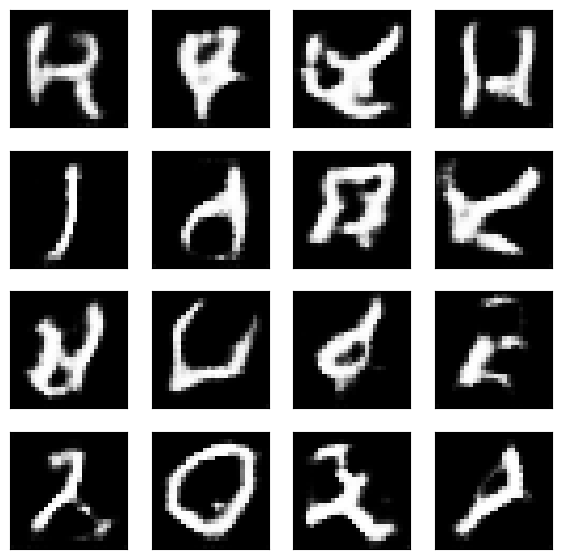

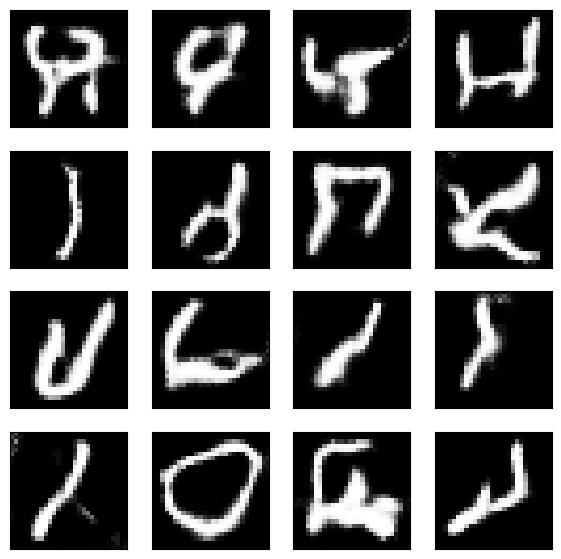

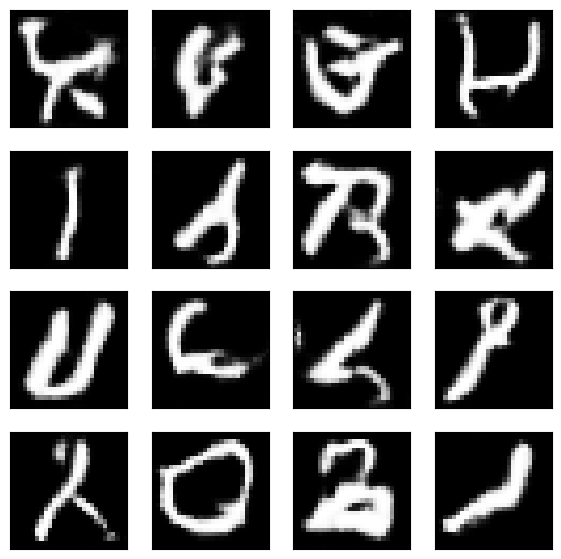

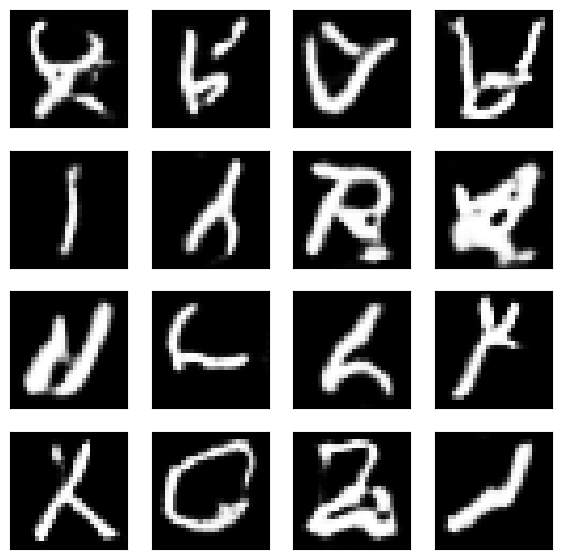

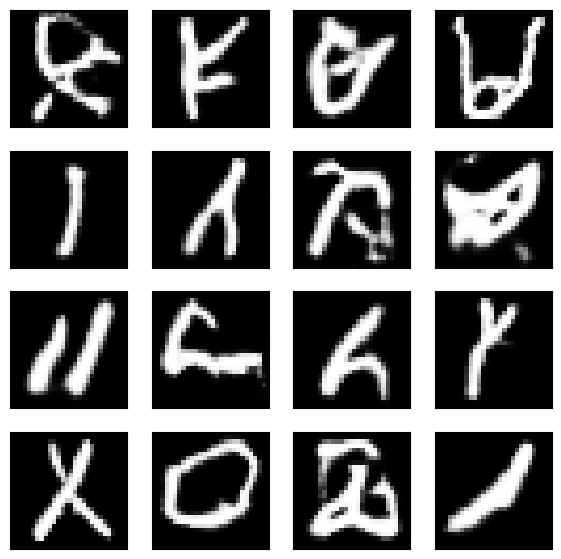

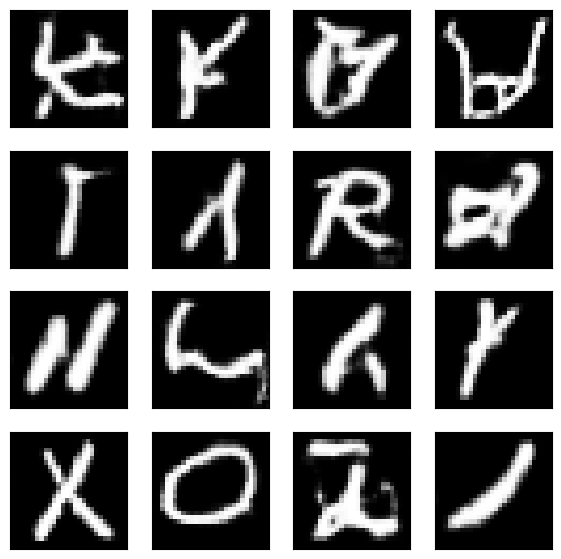

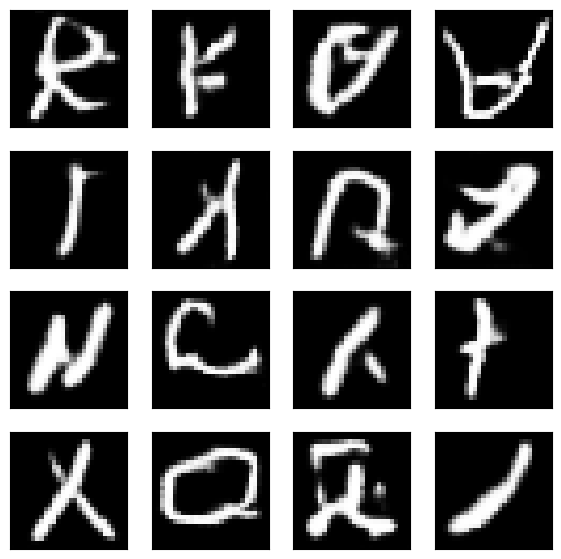

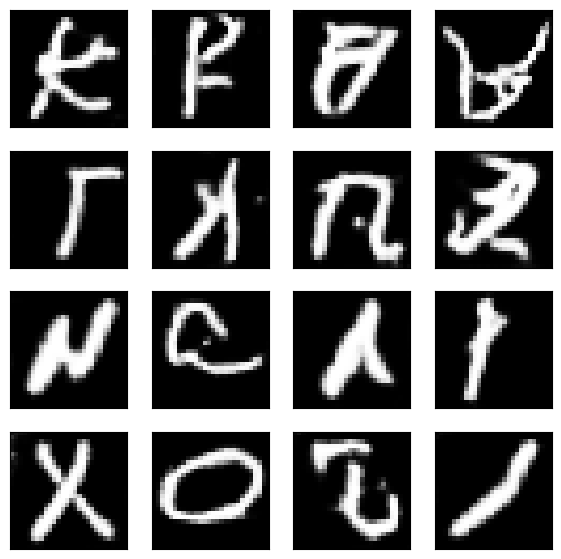

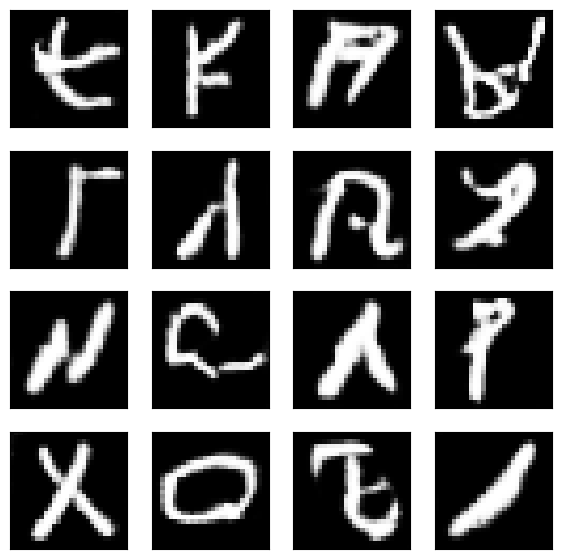

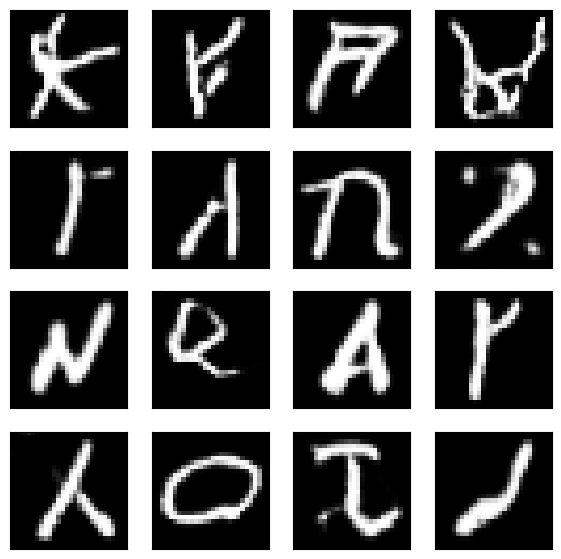

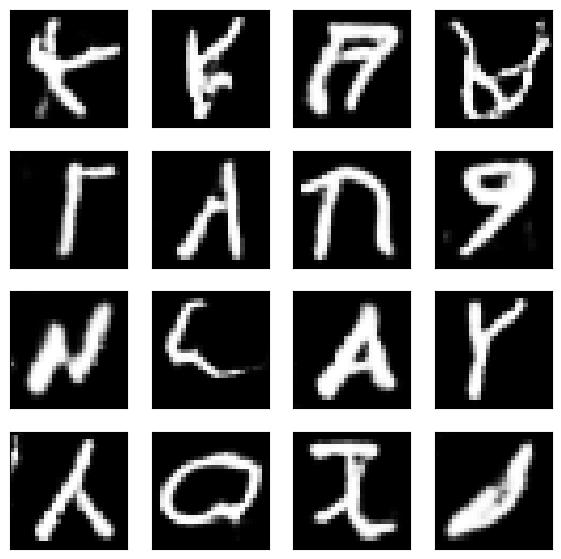

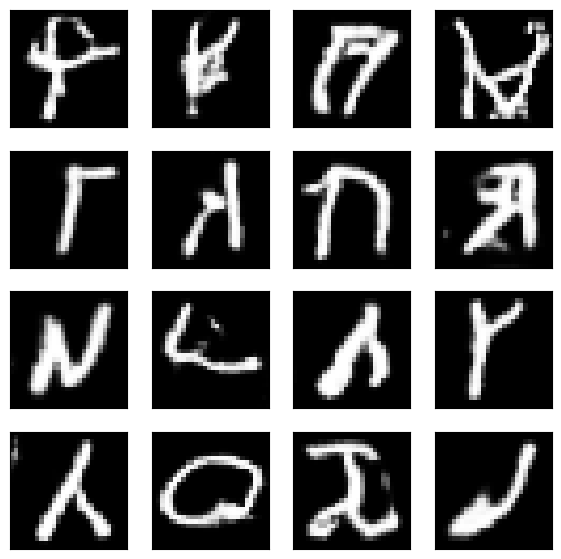

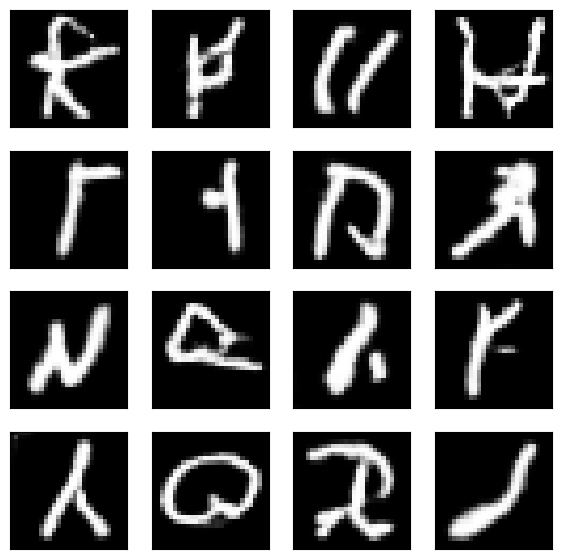

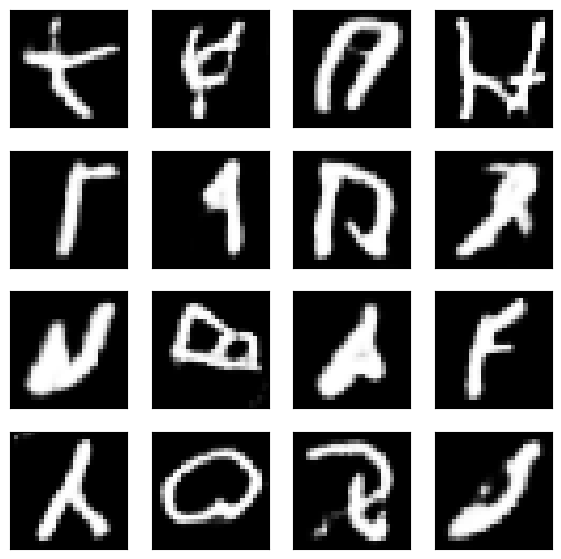

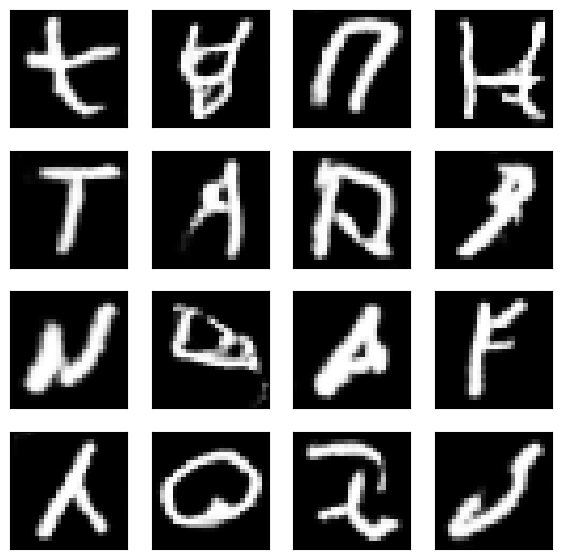

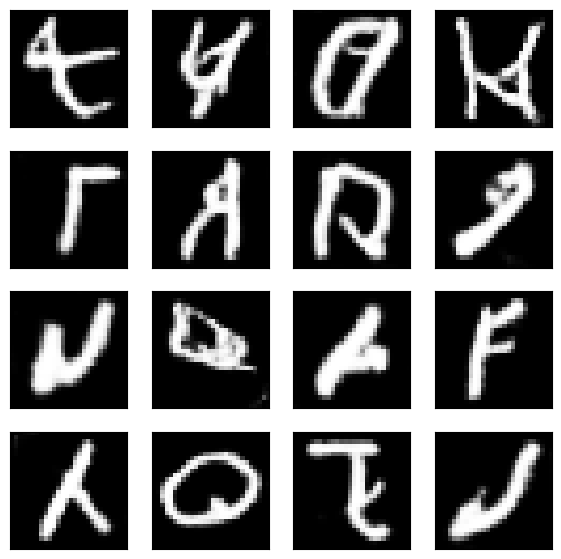

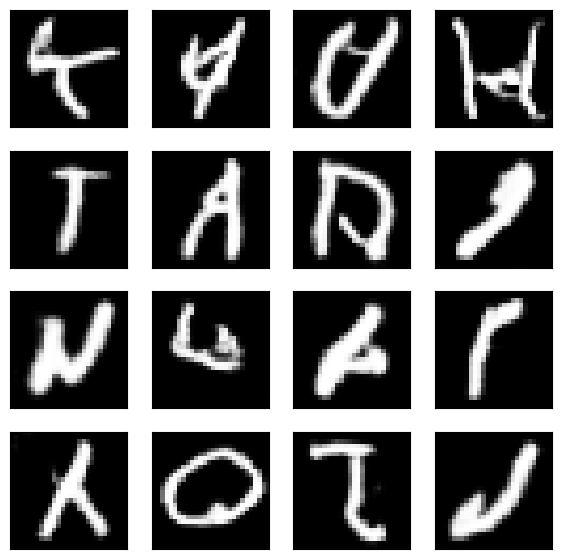

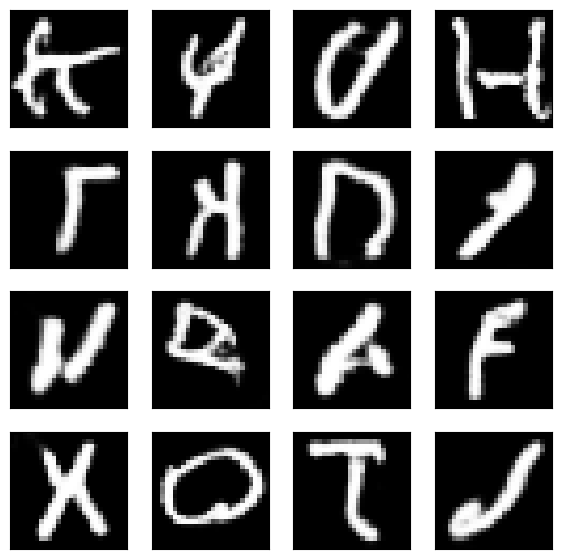

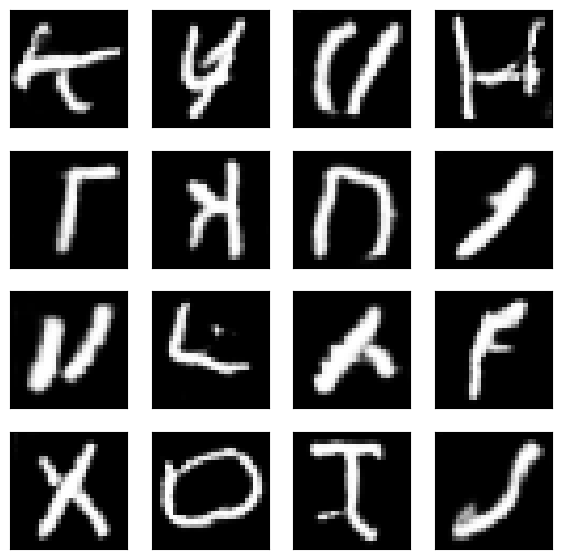

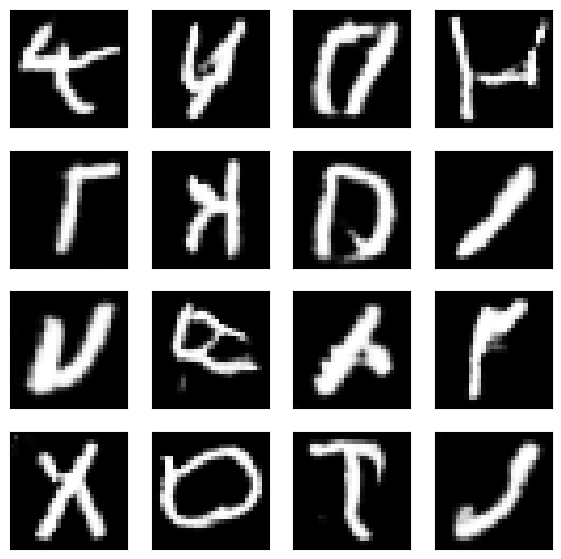

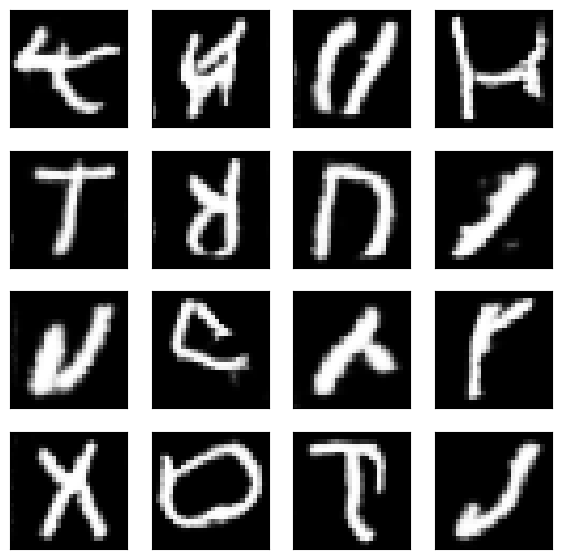

In [ ]:
# Save generated images using the fixed samples from the generator for monitoring the progress.

# The generated images are obtained from the generator model using fixed samples of random noise.
# These fixed samples are typically created at the beginning of training and remain constant throughout.

# The purpose of saving these generated images is to monitor the progress of the generator over time.
# By observing the quality and diversity of the generated images, we can assess how well the generator is learning.

# These images can provide insights into whether the generator is converging to produce realistic outputs,
# or if there are any issues such as mode collapse or lack of diversity in the generated samples.

# Saving and analyzing these generated images can help in identifying problems and fine-tuning the training process.

# The specific implementation details of saving the generated images may depend on the framework or library being used.
# Typically, the images are saved to a file or displayed for visual inspection.

# It is common to save these generated images periodically, such as after each epoch or a certain number of iterations,
# to visualize the progression and evaluate the generator's performance.

my_losses_for_discri, my_losses_for_gener = train(D, G, our_disc_optimizer, our_gen_optimizer, final_training_data_loader, batch_size)

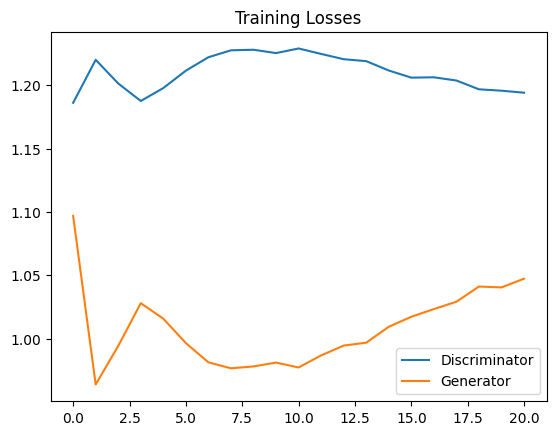

In [ ]:
fig, ax = plt.subplots()
cuda_tensor_list1 = [tensor.to('cuda:0')/len(final_training_data_loader) for tensor in my_losses_for_discri]  # Move each tensor to the GPU if it's not already there

cpu_tensor_list1 = [tensor.cpu() for tensor in cuda_tensor_list1]  # Copy each tensor to the CPU

numpy_array_list1 = [tensor.detach().numpy() for tensor in cpu_tensor_list1]

cuda_tensor_list2 = [tensor2.to('cuda:0')/len(final_training_data_loader) for tensor2 in my_losses_for_gener]  # Move each tensor to the GPU if it's not already there

cpu_tensor_list2 = [tensor2.cpu() for tensor2 in cuda_tensor_list2]  # Copy each tensor to the CPU

numpy_array_list2 = [tensor2.detach().numpy() for tensor2 in cpu_tensor_list2]

plt.plot(numpy_array_list1, label='Discriminator')

plt.plot(numpy_array_list2, label='Generator')

plt.title("Training Losses")
plt.legend()